<a href="https://colab.research.google.com/github/AdityaKumbhar21/Machine-Learning/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Implementation

### Univariate Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Now first we will create a basic data points to able to train to the model.

In [ ]:
x_train  = np.array([1.0,1.3,2,0.9])  # x train are the data points which indicates independent values, in our case the size of the house(in 1000 sq.ft).
y_train = np.array([300,350,500,280]) # y train are the data points which indicates the target values , in our case the price of the house(in 1000's).

In [ ]:
# defining the number of training examples i.e. m
m = len(x_train)
print(m)

4


Now we will plot our data on the scatter plot.

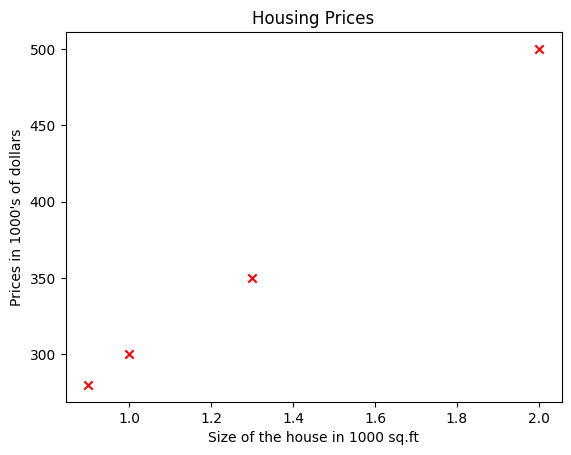

In [ ]:
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.title("Housing Prices")
plt.ylabel("Prices in 1000's of dollars")
plt.xlabel("Size of the house in 1000 sq.ft")
plt.show()

As we know we need **w and b** parameters to create the best fit line so lets define them and initialize them with some value

In [ ]:
# let's take w and b 's initial value to 10
w = 200
b = 100
print(f"The parameters w,b = {w,b}")

The parameters w,b = (200, 100)


In [ ]:
# creating a function for predicting the actual value
def compute_model(x,w,b):
  m = len(x)
  f_wb = np.zeros(m)
  for i in range(m):
    f_wb[i] = w*x[i] + b
  return f_wb

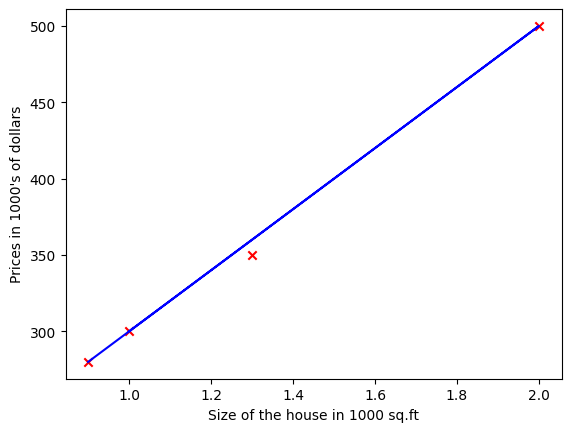

In [ ]:
# calling the compute_cost() method

tmp_f = compute_model(x_train,w,b)

# plotting the predictions made by our model

plt.plot(x_train, tmp_f, c = 'b', label='Our predictions')
plt.scatter(x_train, y_train, marker = 'x',c='r',label = 'Actual values')
plt.ylabel("Prices in 1000's of dollars")
plt.xlabel("Size of the house in 1000 sq.ft")
plt.show()

Now let's define the cost function

In [ ]:
def calculate_cost(x,y,w,b):
  m = len(x)
  sum_cost = 0
  for i in range(m):
    f_wb = w* x[i] + b
    cost = (f_wb - y[i]) ** 2
    sum_cost = sum_cost + cost

  total_cost = (1/(2*m)) * sum_cost

  return total_cost

Now let's implement gradient descent

In [ ]:
# defining the method of computing the partial derivatives J(w,b)

def compute_gradients(x,y,w,b):
  m = len(x)

# derivatives w.r.t the w and b
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = (f_wb - y[i])
    dj_dw += dj_dw_i # adding the sum of each ith data point in the org dj_dw
    dj_db += dj_db_i # adding the sum of each ith data point in the org dj_dw
  dj_dw = dj_dw/m # dividing the ebtire by m as per the formula
  dj_db = dj_db/m # dividing the ebtire by m as per the formula

  return dj_dw, dj_db


In [ ]:
# defining the gradient descent
import math
def gradient_descent(x,y,w_in,b_in ,alpha, iters, cost_function, calc_gradients):

  cost_history = []
  para_history = []
  w = w_in
  b = b_in

  for i in range(iters):
    dj_dw, dj_db = calc_gradients(x,y,w,b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    # saving the cost history
    cost_history.append(cost_function(x,y,w,b))
    para_history.append([w,b])

    if i% math.ceil(iters/10) == 0:
            print(f"Iteration {i:4}: Cost {cost_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

  return w, b, cost_history, para_history

In [ ]:
# initilze w and b
w_init = 0
b_init = 0

iterations = 10000
alpha = 0.01  # 1.0e-2 -> 0.01

w_final, b_final , cost_history, para_history = gradient_descent(x_train, y_train,w_init, b_init, alpha, iterations,calculate_cost, compute_gradients)

print(f"Final w: {w_final} and Final b: {b_final}")

Iteration    0: Cost 6.39e+04  dj_dw: -5.018e+02, dj_db: -3.575e+02   w:  5.018e+00, b: 3.57500e+00
Iteration 1000: Cost 2.18e+01  dj_dw: -7.463e-01, dj_db:  1.039e+00   w:  1.887e+02, b: 1.13261e+02
Iteration 2000: Cost 1.27e+01  dj_dw: -3.862e-01, dj_db:  5.375e-01   w:  1.941e+02, b: 1.05656e+02
Iteration 3000: Cost 1.03e+01  dj_dw: -1.999e-01, dj_db:  2.781e-01   w:  1.970e+02, b: 1.01721e+02
Iteration 4000: Cost 9.61e+00  dj_dw: -1.034e-01, dj_db:  1.439e-01   w:  1.984e+02, b: 9.96841e+01
Iteration 5000: Cost 9.44e+00  dj_dw: -5.352e-02, dj_db:  7.448e-02   w:  1.992e+02, b: 9.86302e+01
Iteration 6000: Cost 9.39e+00  dj_dw: -2.770e-02, dj_db:  3.854e-02   w:  1.996e+02, b: 9.80849e+01
Iteration 7000: Cost 9.38e+00  dj_dw: -1.433e-02, dj_db:  1.995e-02   w:  1.998e+02, b: 9.78027e+01
Iteration 8000: Cost 9.38e+00  dj_dw: -7.417e-03, dj_db:  1.032e-02   w:  1.999e+02, b: 9.76566e+01
Iteration 9000: Cost 9.38e+00  dj_dw: -3.838e-03, dj_db:  5.341e-03   w:  1.999e+02, b: 9.75810e+01


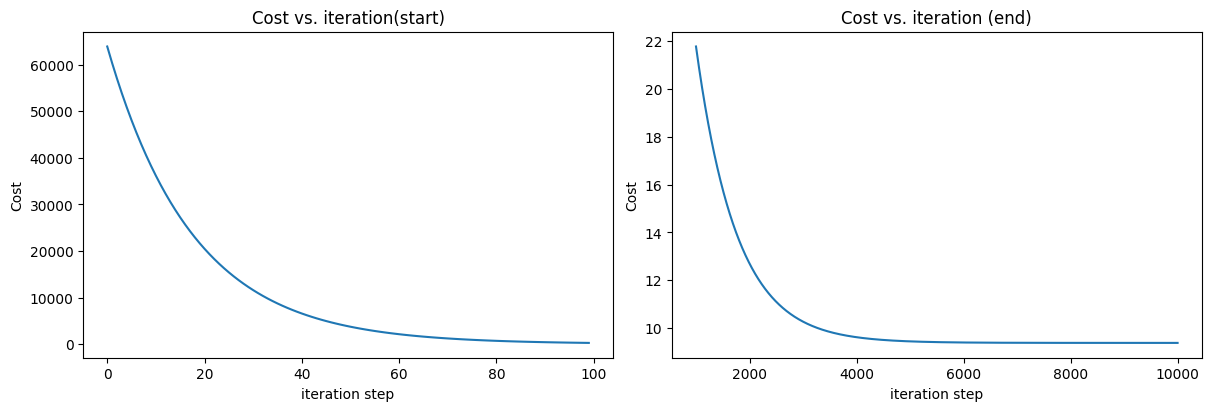

In [ ]:
# plotting the  cost vs iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()